# Import the necessary libraries

In [126]:
import pandas as pd

# Assign the dataset into the variable name as data

In [127]:
data = pd.read_csv('Wine_Quality_Data.csv')

In [128]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [129]:
data['color'].unique()

array(['red', 'white'], dtype=object)

# Show the data-types of each column

In [130]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

# Show the color column

In [131]:
data['color']

0         red
1         red
2         red
3         red
4         red
5         red
6         red
7         red
8         red
9         red
10        red
11        red
12        red
13        red
14        red
15        red
16        red
17        red
18        red
19        red
20        red
21        red
22        red
23        red
24        red
25        red
26        red
27        red
28        red
29        red
        ...  
6467    white
6468    white
6469    white
6470    white
6471    white
6472    white
6473    white
6474    white
6475    white
6476    white
6477    white
6478    white
6479    white
6480    white
6481    white
6482    white
6483    white
6484    white
6485    white
6486    white
6487    white
6488    white
6489    white
6490    white
6491    white
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object

# Define a function which convert red color into '0' and white color into '1'

In [132]:
def color_change(x):
    if(x == 'red'):
        return 0
    else:
        return 1

# Apply the defined function into the color column

In [133]:
data['color'] = data['color'].apply(color_change)

In [134]:
data['color']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6467    1
6468    1
6469    1
6470    1
6471    1
6472    1
6473    1
6474    1
6475    1
6476    1
6477    1
6478    1
6479    1
6480    1
6481    1
6482    1
6483    1
6484    1
6485    1
6486    1
6487    1
6488    1
6489    1
6490    1
6491    1
6492    1
6493    1
6494    1
6495    1
6496    1
Name: color, Length: 6497, dtype: int64

# Import the necessary libraries for plotting a heat map

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
sns.set()

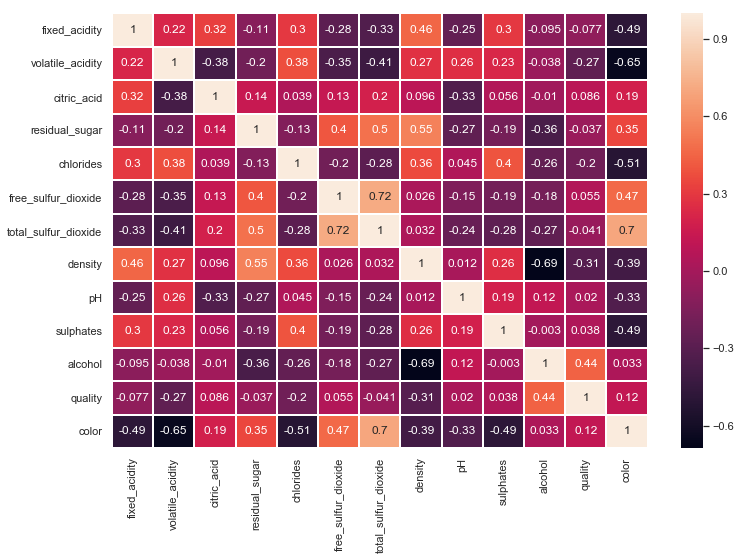

In [137]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(data.corr(), annot = True, linewidth = 1, linecolor = 'w')

# Show the name of each column

In [138]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

# Assign the column according to the max value of heat map

In [139]:
training_data = data[['total_sulfur_dioxide', 'volatile_acidity', 'chlorides', 'fixed_acidity', 'sulphates', 'free_sulfur_dioxide']]

# Assign the output data

In [140]:
output_data = data['color']

# Applying the Logistic Regression to find the accuracy

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,
                                       test_size=0.3, random_state = 42)

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
model = LogisticRegression()

In [145]:
model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predicting the value from the training model

In [146]:
predictions = model.predict(x_test)

In [147]:
predictions[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# Importing the necessary library for confusion matrix

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [149]:
confusion_matrix(predictions, y_test)

array([[ 460,   20],
       [  42, 1428]], dtype=int64)

# Finding the accuracy using Logistic Regression

In [150]:
score = accuracy_score(predictions, y_test)

In [151]:
score

0.9682051282051282

# Importing the necessary library for Grid Search

In [152]:
from sklearn .model_selection import GridSearchCV

# Assigning the values of neighbors to the parameters variable

In [153]:
parameters = {'n_neighbors' : [5, 10, 15, 13]}

In [154]:
grid_search.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 13, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Finding the best parameters

In [155]:
grid_search.best_params_

{'n_neighbors': 10}

# Finding the best score

In [156]:
grid_search.best_score_

0.938860787332307

# Importing the necessary library for KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
knn_model = KNeighborsClassifier()

In [159]:
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Predicting from model

In [160]:
knn_predictions = knn_model.predict(x_test)

# Finding the score

In [161]:
knn_score = accuracy_score(knn_predictions, y_test)
knn_score

0.9287179487179488

# Using Grid Search 

In [162]:
from sklearn .model_selection import GridSearchCV

In [163]:
parameters = {'n_neighbors' : [5, 10, 15, 13, 100]}

In [164]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = parameters)

In [165]:
grid_search.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 13, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
grid_search.best_params_

{'n_neighbors': 10}

In [167]:
grid_search.best_score_

0.938860787332307

# Importing the necessary library for Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
dt_model = DecisionTreeClassifier()

In [170]:
dt_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predicting from model

In [171]:
dt_predictions = dt_model.predict(x_test)

# Finding the accuracy or score

In [172]:
dt_score = accuracy_score(dt_predictions, y_test)
dt_score

0.9846153846153847

# Importing the necessary library for SVM

In [173]:
from sklearn.svm import SVC

In [174]:
svm_model = SVC()

In [175]:
svm_model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [176]:
svm_predictions = svm_model.predict(x_test)

In [177]:
svm_score = accuracy_score(svm_predictions, y_test)
svm_score

0.921025641025641

# Using Grid Search

In [178]:
grid_search_svm = GridSearchCV(SVC(kernel = 'rbf'), param_grid = svm_parameters)

In [179]:
svm_parameters = {
    'C' : [0.01, 0.1, 1, 10, 100]
}

In [180]:
grid_search_svm.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto'

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [181]:
grid_search_svm.best_params_

{'C': 1}

In [182]:
grid_search_svm.best_score_

0.928964152188256